# Install

In [1]:
!pip install pgmpy==0.1.21

In [2]:
!pip install numpy==1.23.5

# Import Library

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import numpy as np
import pickle

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

from pgmpy.estimators import HillClimbSearch, K2Score, BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report

# Dataset dan Variabel

## Dataset

In [4]:
data = pd.read_csv("/content/Student_performance_data_.csv")
data.head(5)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  
4             0  1.288061         4.0

## Preprocessing Dataset

### Analisis Statistik Deskriptif

In [5]:
data.describe()

StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000         1.000000   
50%           9.705363    15.000000     0.000000         2.000000   
75%          14.408410    22.000000     1.000000         3.000000   
max          19.978094    29.000000     1.000000         4.000000   

       Extracurricular       Sports        Music  Volunteering          GPA  \
count      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000   
mean          0.383361     0.303512     0.196906      0.157191     1.906186   
std           0.486307     0.459870     0.397744      0.364057     0.915156   
min           0.000000     0.000000     0.000000      0.000000     0.000000   
25%           0.000000     0.000000     0.000000      0.000000     1.174803   
50%           0.000000     0.000000     0.000000      0.000000     1.893393   
75%           1.000000     1.000000     0.000000      0.000000     2.622216   
max           1.000000     1.000000     1.000000      1.000000     4.000000   

        GradeClass  
count  2392.000000  
mean      2.983696  
std       1.233908  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       4.000000  
max       4.000000

In [6]:
print(data["Gender"].value_counts().to_frame())
print(data["Ethnicity"].value_counts().to_frame())
print(data["ParentalEducation"].value_counts().to_frame())
print(data["ParentalSupport"].value_counts().to_frame())
print(data["Extracurricular"].value_counts().to_frame())
print(data["Sports"].value_counts().to_frame())
print(data["Music"].value_counts().to_frame())
print(data["Volunteering"].value_counts().to_frame())
print(data["GradeClass"].value_counts().to_frame())

        count
Gender       
1        1222
0        1170
           count
Ethnicity       
0           1207
1            493
2            470
3            222
                   count
ParentalEducation       
2                    934
1                    728
3                    367
0                    243
4                    120
                 count
ParentalSupport       
2                  740
3                  697
1                  489
4                  254
0                  212
                 count
Extracurricular       
0                 1475
1                  917
        count
Sports       
0        1666
1         726
       count
Music       
0       1921
1        471
              count
Volunteering       
0              2016
1               376
            count
GradeClass       
4.0          1211
3.0           414
2.0           391
1.0           269
0.0           107


### Penanganan Missing Value

In [7]:
# Jumlah missing value masing-masing kolom
print(data.isna().sum())
# Hitung jumlah missing value
print("Jumlah Missing Value:" , data.isnull().sum().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Jumlah Missing Value: 0


Berdasarkan pengecekan tidak ditemukan missing value, sehingga tidak akan dilakukan pemrosesan apapun untuk case **Missing Value**



### Normalisasi atau diskretisasi variabel

In [8]:
# copy data_mapped
data_normalization = data.copy()
# hilangkan whitespace
data_normalization.columns = data_normalization.columns.str.strip()

menghilangkan whitespace (spasi, tab, baris baru, dll.) yang mungkin ada di awal atau di akhir setiap nama kolom.

In [9]:
# Tangani GPA dan diskretisasi langsung
data_normalization['GPA'] = data_normalization['GPA'].apply(lambda x: 1.9 if x < 2.0 else x)

# Bins dan labels untuk diskretisasi GPA dan StudyTimeWeekly
gpa_bins = [0, 2.0, 2.5, 3.0, 3.5, float('inf')]  # Bins harus monoton meningkat
gpa_labels = [4, 3, 2, 1, 0]  # Label untuk setiap bin GPA

study_bins = [0, 5, 10, 15, float('inf')]  # Bins untuk StudyTimeWeekly
study_labels = [0, 1, 2, 3]  # Label untuk setiap bin StudyTimeWeekly

# Terapkan pd.cut untuk diskretisasi
data_normalization['GPA_Disc'] = pd.cut(data_normalization['GPA'], bins=gpa_bins, labels=gpa_labels, right=False)
data_normalization['StudyTimeWeekly_Disc'] = pd.cut(data_normalization['StudyTimeWeekly'], bins=study_bins, labels=study_labels, right=False)

data_normalization[['GPA_Disc', 'StudyTimeWeekly_Disc']].head()

GPA_Disc StudyTimeWeekly_Disc
0        2                    3
1        1                    3
2        4                    0
3        3                    2
4        4                    0

In [10]:
data_normalization[['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GPA_Disc', 'StudyTimeWeekly_Disc']].head(5)

Age  StudyTimeWeekly  Absences       GPA GPA_Disc StudyTimeWeekly_Disc
0   17        19.833723         7  2.929196        2                    3
1   18        15.408756         0  3.042915        1                    3
2   15         4.210570        26  1.900000        4                    0
3   17        10.028829        14  2.054218        3                    2
4   17         4.672495        17  1.900000        4                    0

In [11]:
data_normalization[['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GPA_Disc' , 'StudyTimeWeekly_Disc']].nunique()

Age                        4
StudyTimeWeekly         2392
Absences                  30
GPA                     1113
GPA_Disc                   5
StudyTimeWeekly_Disc       4
dtype: int64

In [12]:
data_normalization[['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GPA_Disc' , 'StudyTimeWeekly_Disc']].describe()

Age  StudyTimeWeekly     Absences          GPA
count  2392.000000      2392.000000  2392.000000  2392.000000
mean     16.468645         9.771992    14.541388     2.287592
std       1.123798         5.652774     8.467417     0.524113
min      15.000000         0.001057     0.000000     1.900000
25%      15.000000         5.043079     7.000000     1.900000
50%      16.000000         9.705363    15.000000     1.900000
75%      17.000000        14.408410    22.000000     2.622216
max      18.000000        19.978094    29.000000     4.000000

### Analisis Korelasi

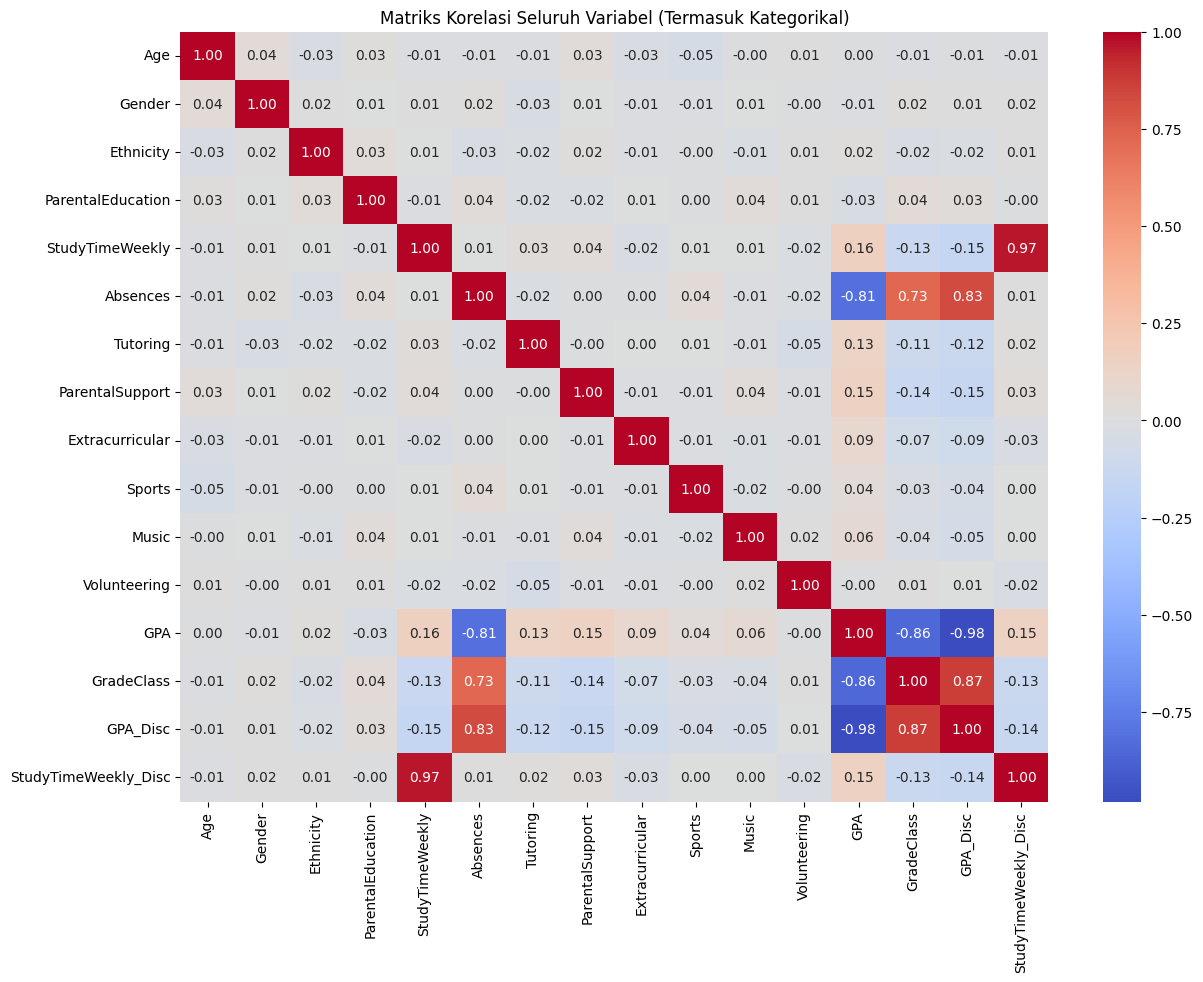

In [13]:
# Salin dataframe
data_encoded = data_normalization.copy()

# Ubah kolom kategorikal menjadi numerik
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Hitung korelasi untuk semua kolom (tanpa StudentID) dengan metode Pearson
correlation_matrix_all = data_encoded.drop(columns=['StudentID']).corr(method='pearson')

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Seluruh Variabel (Termasuk Kategorikal)")
plt.show()

Heatmap korelasi menggunakan warna untuk menggambarkan kekuatan hubungan antara variabel. Penjelasannya seperti berikut.

1. Warna Gelap di Heatmap: Warna gelap (misalnya merah atau biru) menunjukkan korelasi yang kuat.
  *   Merah gelap artinya korelasi positif sangat kuat (nilai mendekati 1).
  *   Biru gelap artinya korelasi negatif sangat kuat (nilai mendekati -1).

2. Warna Lain:
  *   Warna yang lebih terang atau lebih pucat menunjukkan korelasi yang lebih lemah (nilai mendekati 0).

3. Angka pada Heatmap sendiri merupakan angka yang menunjukkan nilai korelasi antara dua variabel:
  *   Nilai 1: Korelasi positif sempurna (ketika satu naik, yang lain juga naik).
  *   Nilai -1: Korelasi negatif sempurna (ketika satu naik, yang lain turun).
  *   Nilai 0: Tidak ada hubungan linier.

Jadi, semakin gelap warnanya, semakin kuat hubungan antar variabel.


Pada visualisasi tersebut terdapat beberapa korelasi yang cukup mencolok, yaitu.
1. Absences vs GPA (-0.31): Korelasi negatif sebesar -0.31 menunjukkan bahwa ada hubungan lemah antara jumlah ketidakhadiran (Absences) dan nilai GPA. Artinya, semakin banyak ketidakhadiran, nilai GPA cenderung sedikit menurun, tetapi hubungan ini tidak terlalu kuat.

2. Absences vs GradeClass (-0.73): Korelasi negatif sebesar -0.73 menunjukkan bahwa ada hubungan negatif cukup kuat antara ketidakhadiran (Absences) dan kelas nilai (GradeClass). Ini berarti semakin banyak ketidakhadiran, semakin rendah kemungkinan untuk mendapatkan nilai yang lebih tinggi (misalnya, A atau B). Hubungan ini lebih kuat dibandingkan dengan korelasi antara Absences dan GPA.

3. Tutoring vs GradeClass (-0.11): Korelasi negatif sebesar -0.11 menunjukkan bahwa hubungan antara tutoring (les privat) dan kelas nilai (GradeClass) sangat lemah. Nilai ini mendekati 0, yang artinya tidak ada hubungan linier yang jelas antara mengikuti les privat dengan kelas nilai yang didapatkan.

### Visualisasi distribusi data untuk memahami pola

In [14]:
# Scatter plot interaktif untuk dua variabel numerik
fig = px.scatter(data_normalization, x='Age', y='GPA', color='GradeClass',
                 title="Hubungan antara Age dan GPA",
                 labels={'Age': 'Usia', 'GPA': 'Nilai GPA'},
                 color_continuous_scale='Viridis')
fig.show()

# Pairplot interaktif antara beberapa variabel
fig = px.scatter_matrix(data_normalization, dimensions=['Age', 'StudyTimeWeekly', 'Absences', 'GPA'],
                        color='GradeClass', title="Matrix Hubungan Antar Variabel",
                        labels={'Age': 'Usia', 'StudyTimeWeekly': 'Waktu Belajar', 'Absences': 'Absensi', 'GPA': 'Nilai GPA'})
fig.show()

In [15]:
# Scatter plot interaktif untuk dua variabel diskrit
fig = px.scatter(data_normalization, x='Age', y='GPA_Disc', color='GradeClass',
                 title="Hubungan antara Age dan GPA Diskrit",
                 labels={'Age': 'Usia', 'GPA_Disc': 'Nilai GPA Diskrit'},
                 color_continuous_scale='Viridis')
fig.show()

# Pairplot interaktif antara beberapa variabel diskrit
fig = px.scatter_matrix(data_normalization, dimensions=['Age', 'StudyTimeWeekly_Disc', 'Absences', 'GPA_Disc'],
                        color='GradeClass', title="Matrix Hubungan Antar Variabel Diskrit",
                        labels={'Age': 'Usia', 'StudyTimeWeekly_Disc': 'Waktu Belajar Diskrit', 'Absences': 'Absensi', 'GPA_Disc': 'Nilai GPA Diskrit'})
fig.show()


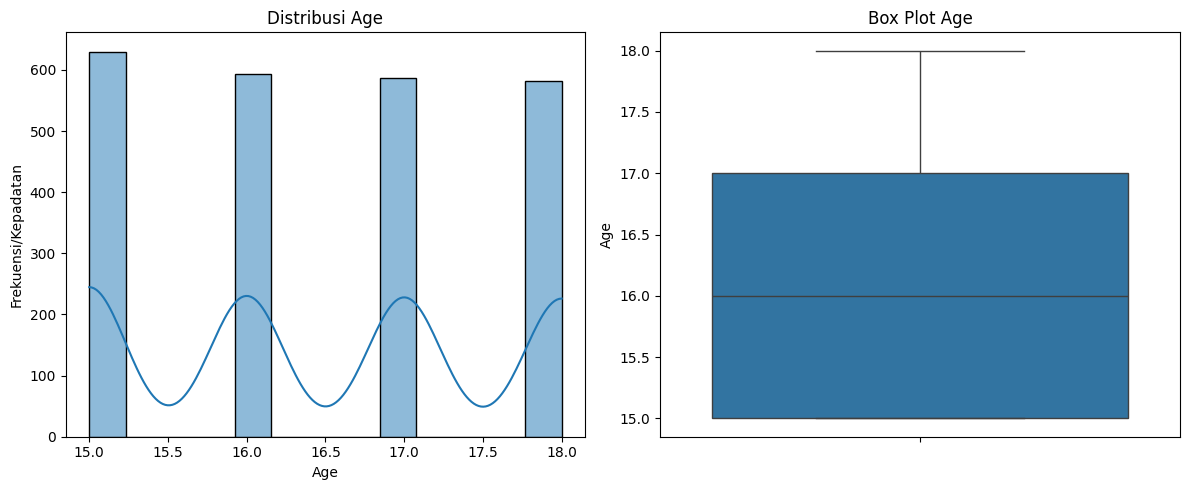

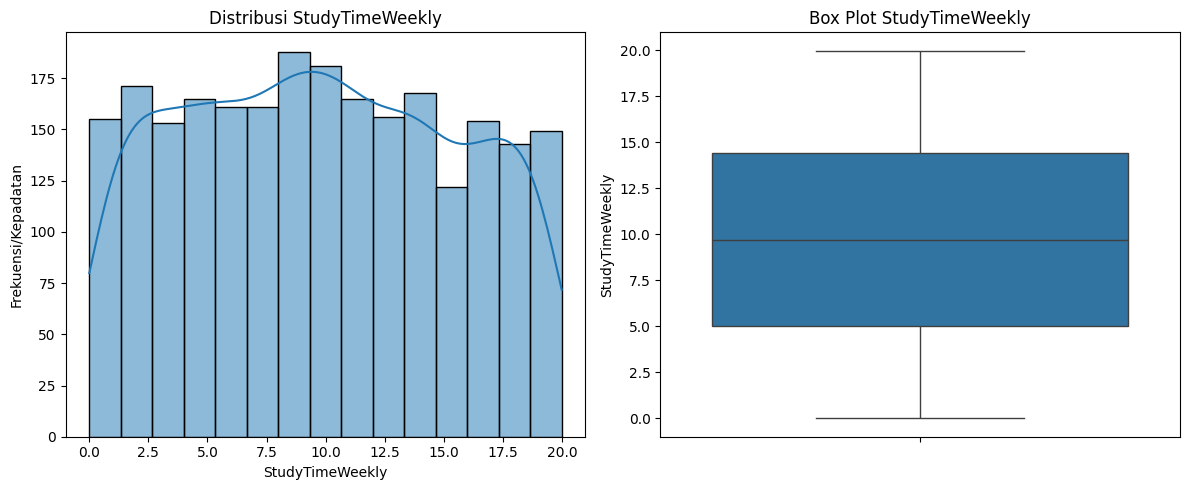

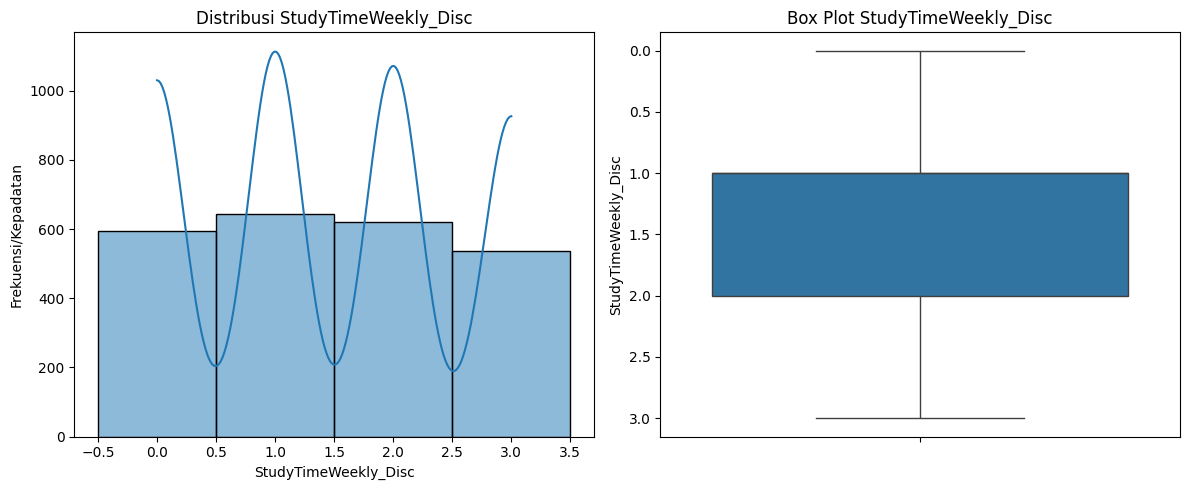

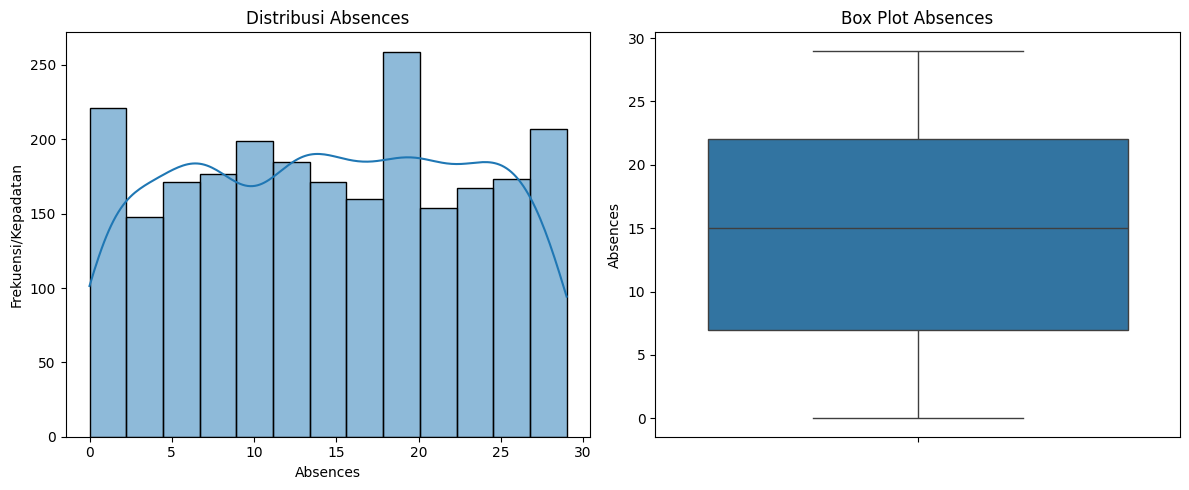

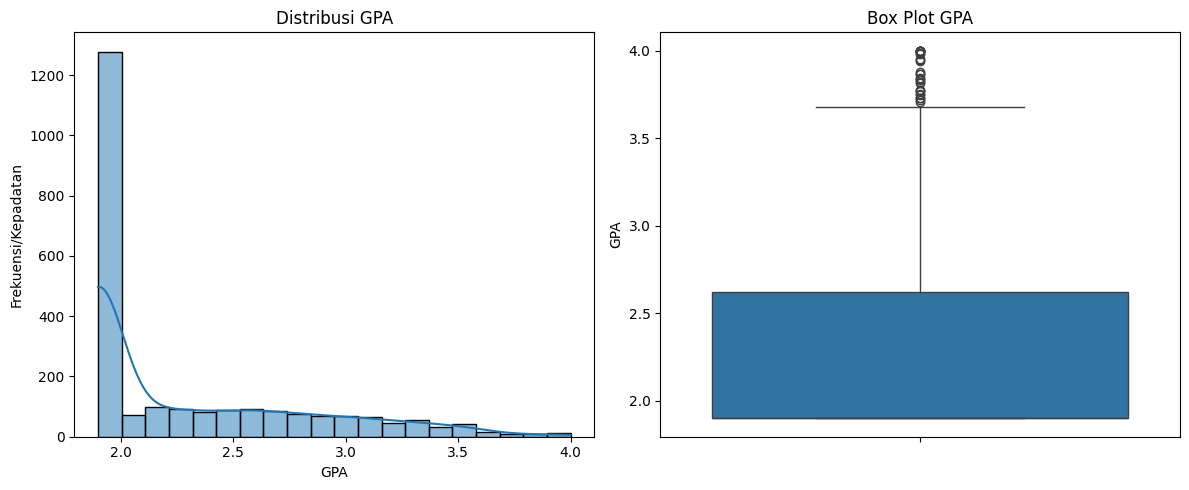

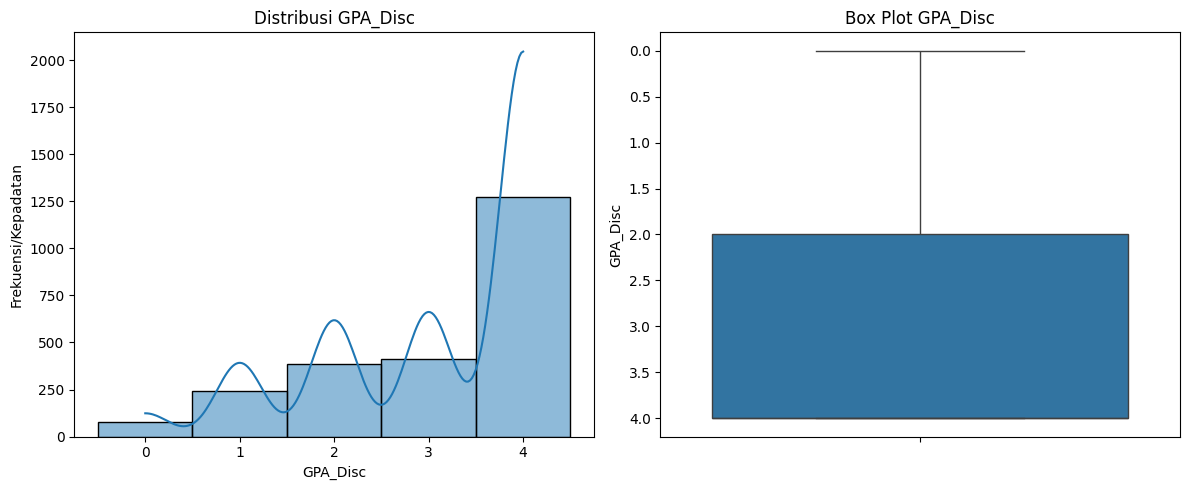

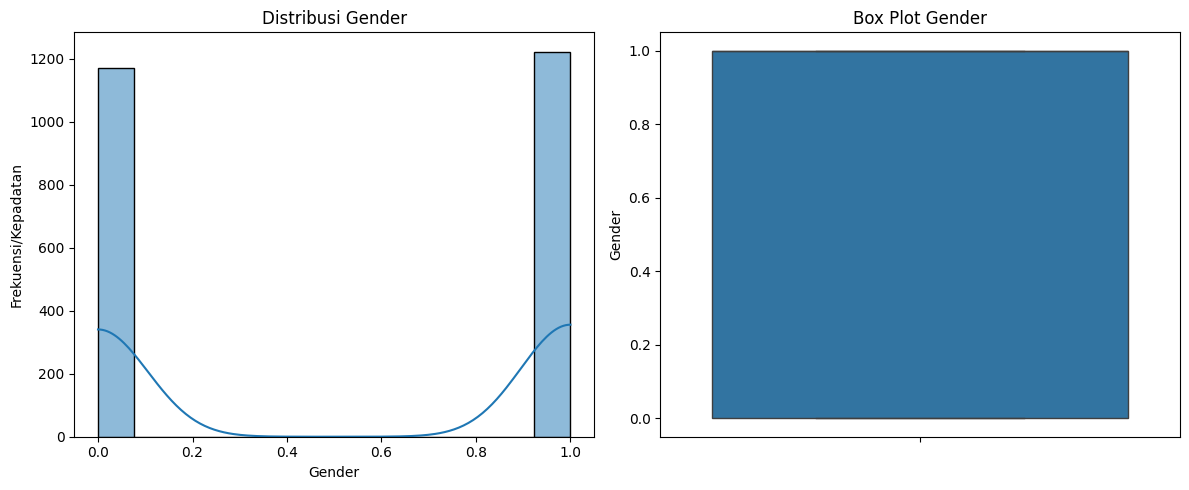

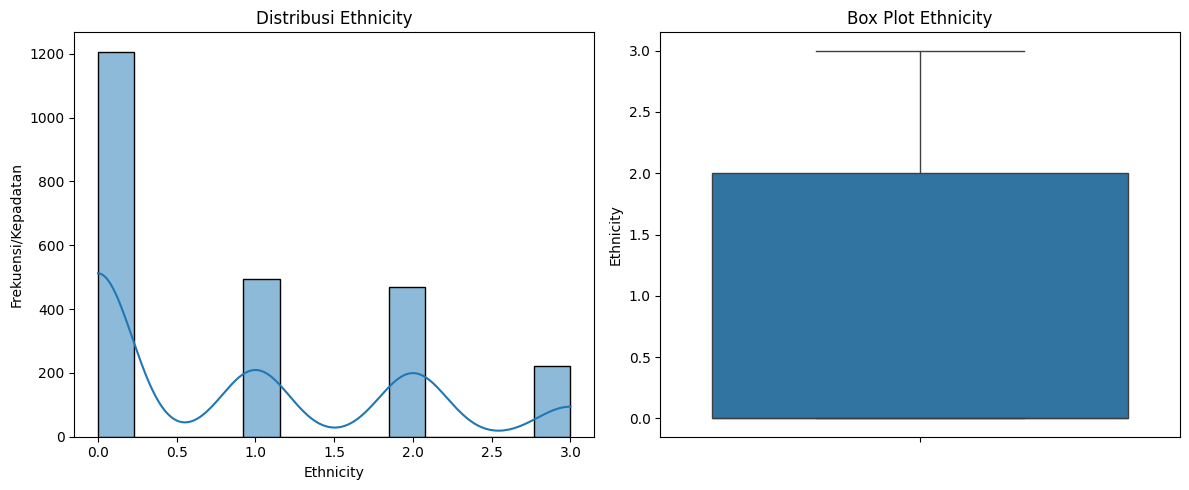

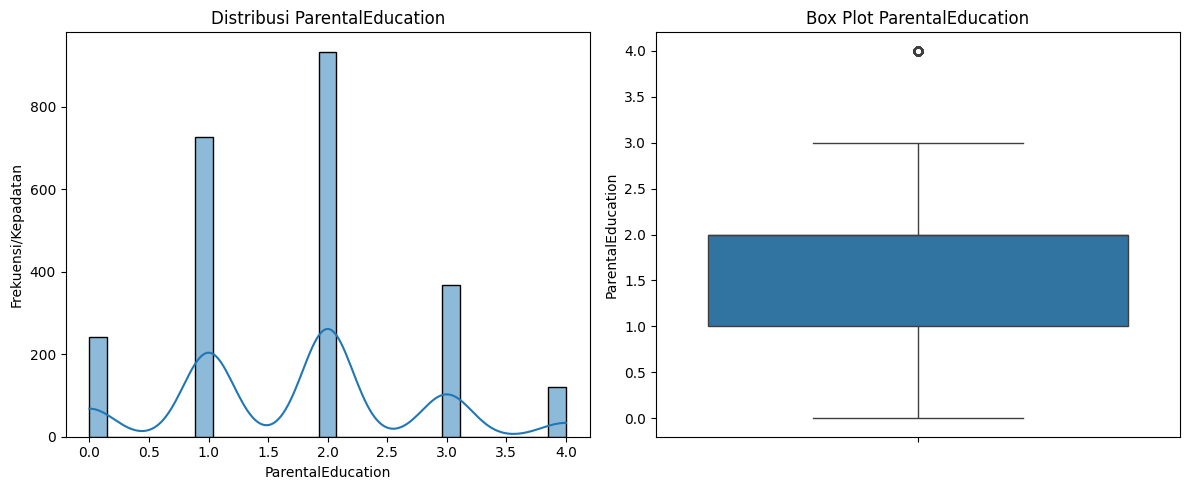

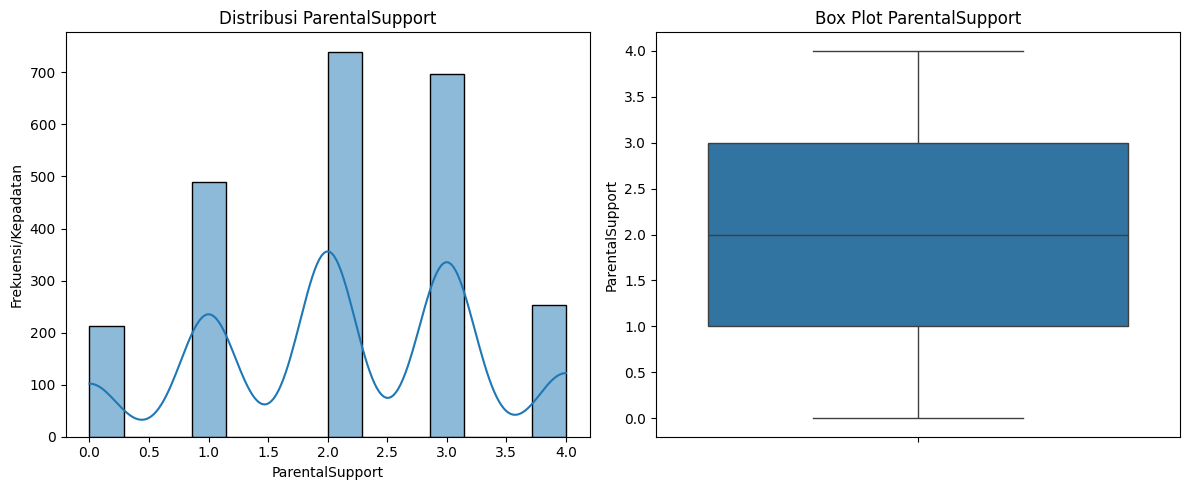

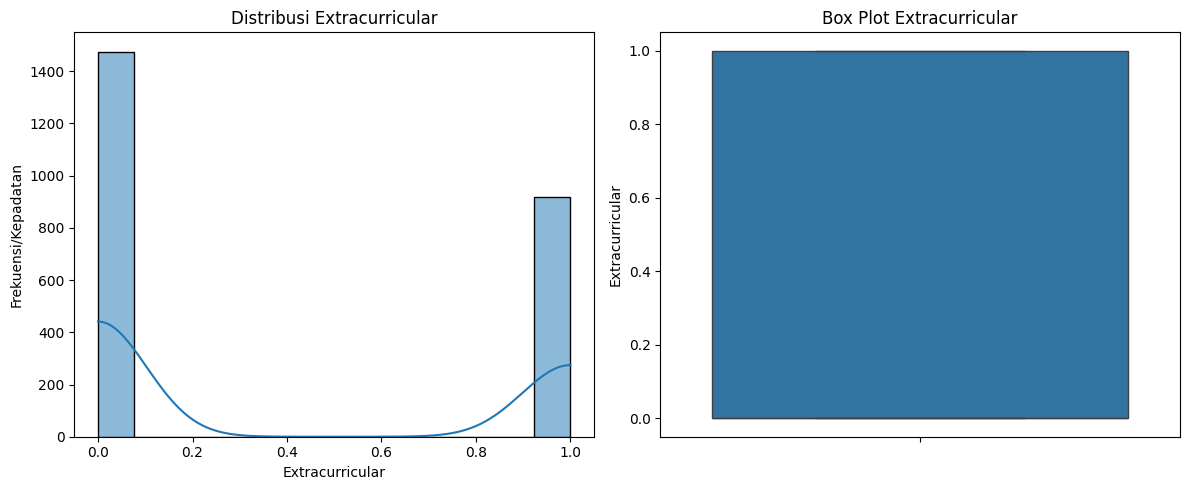

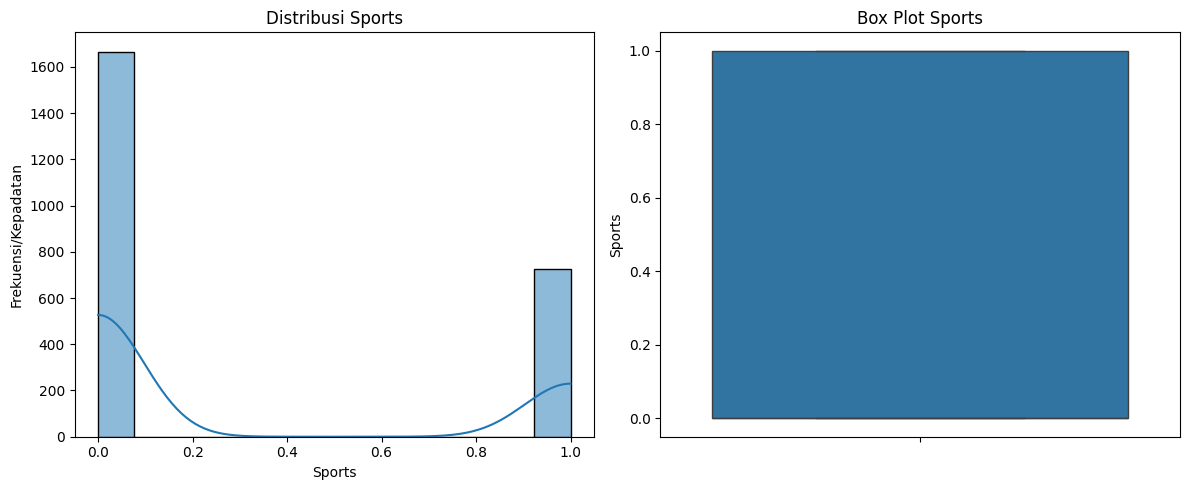

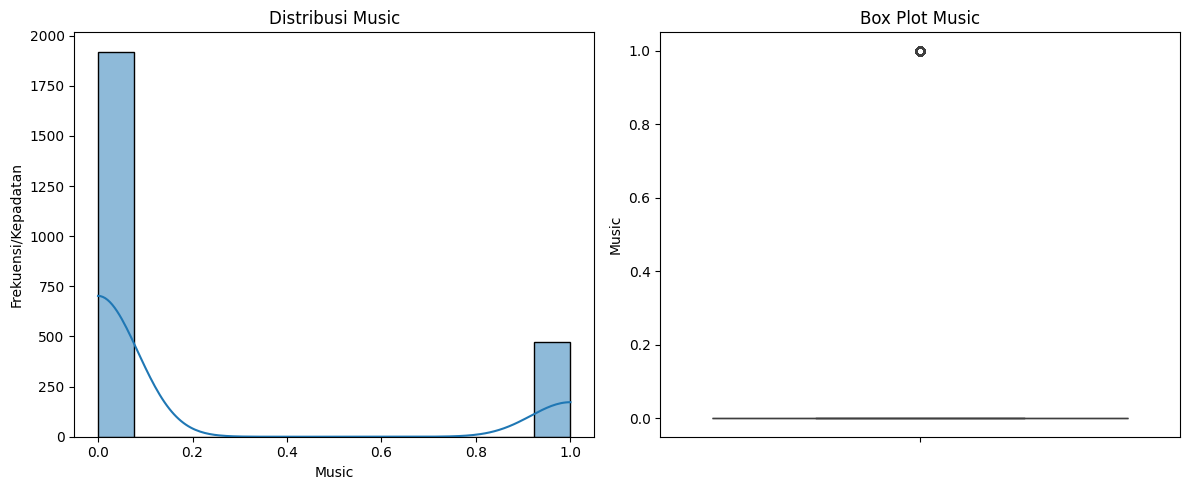

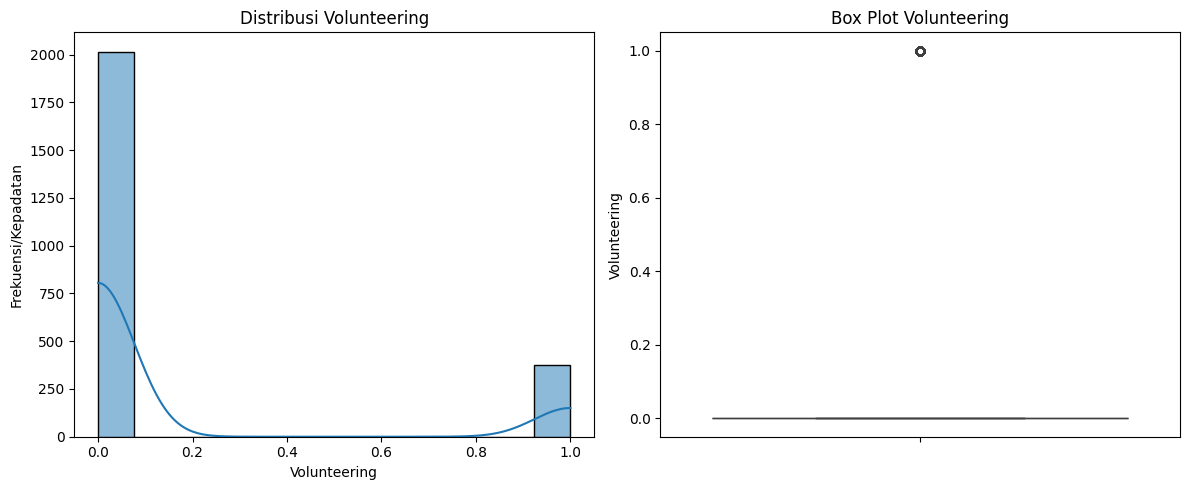

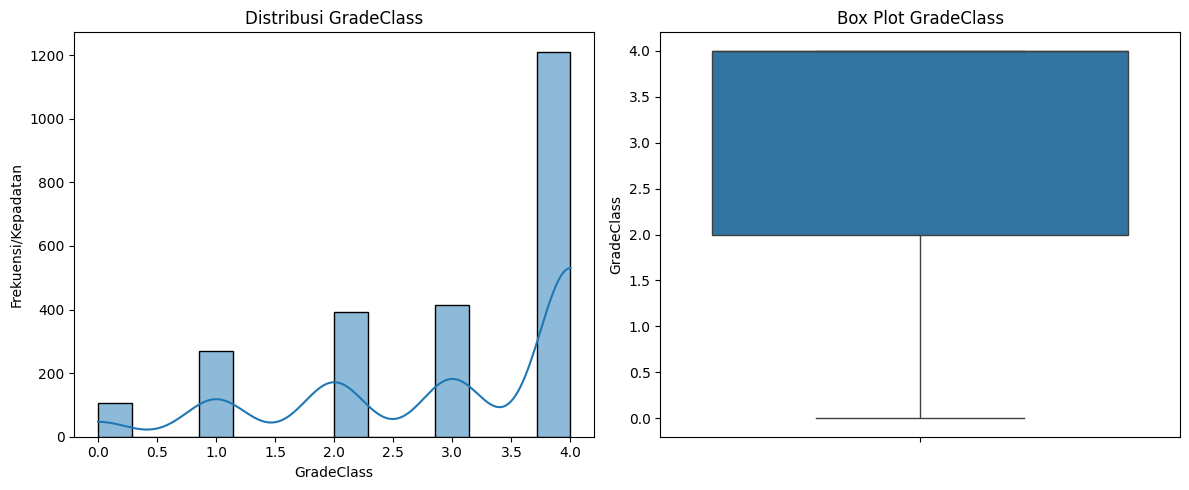

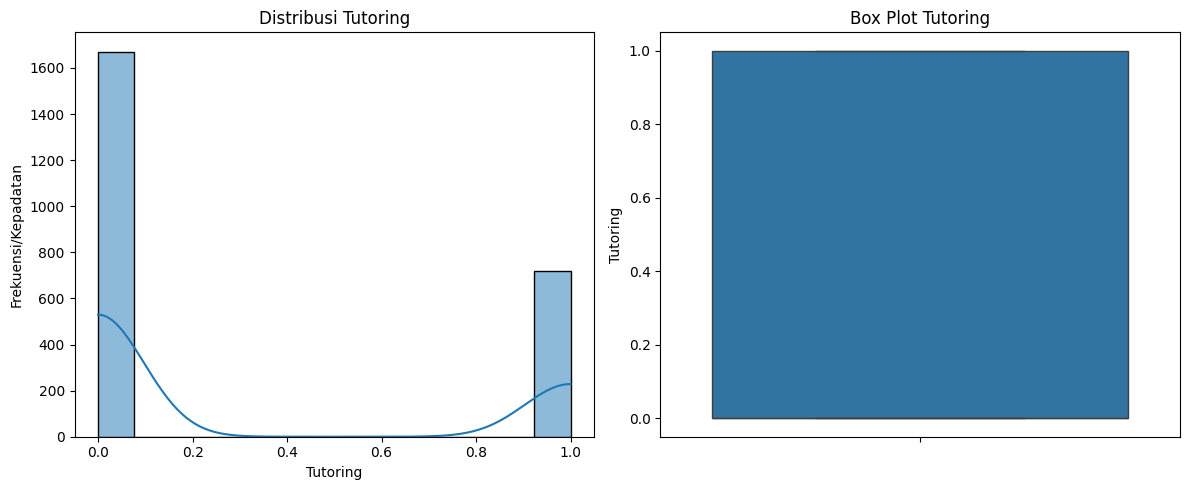

In [16]:
# Fitur numerik (kontinu atau telah dinormalisasi)
numerical_features = ['Age', 'StudyTimeWeekly', 'StudyTimeWeekly_Disc', 'Absences', 'GPA', 'GPA_Disc', 'Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
                        'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass', 'Tutoring']

# Visualisasi distribusi untuk fitur numerik (histogram dan boxplot)
for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data_normalization[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi/Kepadatan')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_normalization[feature])
    plt.title(f'Box Plot {feature}')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Model Penalaran Probabilistik

## Bayesian Network

### Datset

In [171]:
data_bn = data_normalization.copy()
# Fitur numerik
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GPA_Disc', 'StudyTimeWeekly_Disc', 'Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
                        'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass', 'Tutoring']

# --- 1. Diskritisasi Variabel Kontinu ---
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_bn[numerical_features] = discretizer.fit_transform(data_bn[numerical_features])

# Ubah kembali ke integer
data_bn[numerical_features] = data_bn[numerical_features].astype(int)

# Drop NaN jika ada setelah preprocessing
data_bn = data_bn.dropna().reset_index(drop=True)

data_bn.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001    3       4          0                  2                4   
1       1002    4       0          0                  1                3   
2       1003    0       0          3                  3                1   
3       1004    3       4          0                  3                2   
4       1005    3       4          0                  2                1   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         1         4                2                0       0      4   
1         0         0                1                0       0      0   
2         4         0                2                0       0      0   
3         2         0                3                4       0      0   
4         2         4                3                0       0      0   

   Volunteering  GPA  GradeClass  GPA_Disc  StudyTimeWeekly_Disc  
0             0    2           2         2                     4  
1             0    2           1         1                     4  
2             0    0           4         4                     0  
3             0    0           3         3                     3  
4             0    0           4         4                     0

### Struktur Bayesian Network

#### Manual Edge

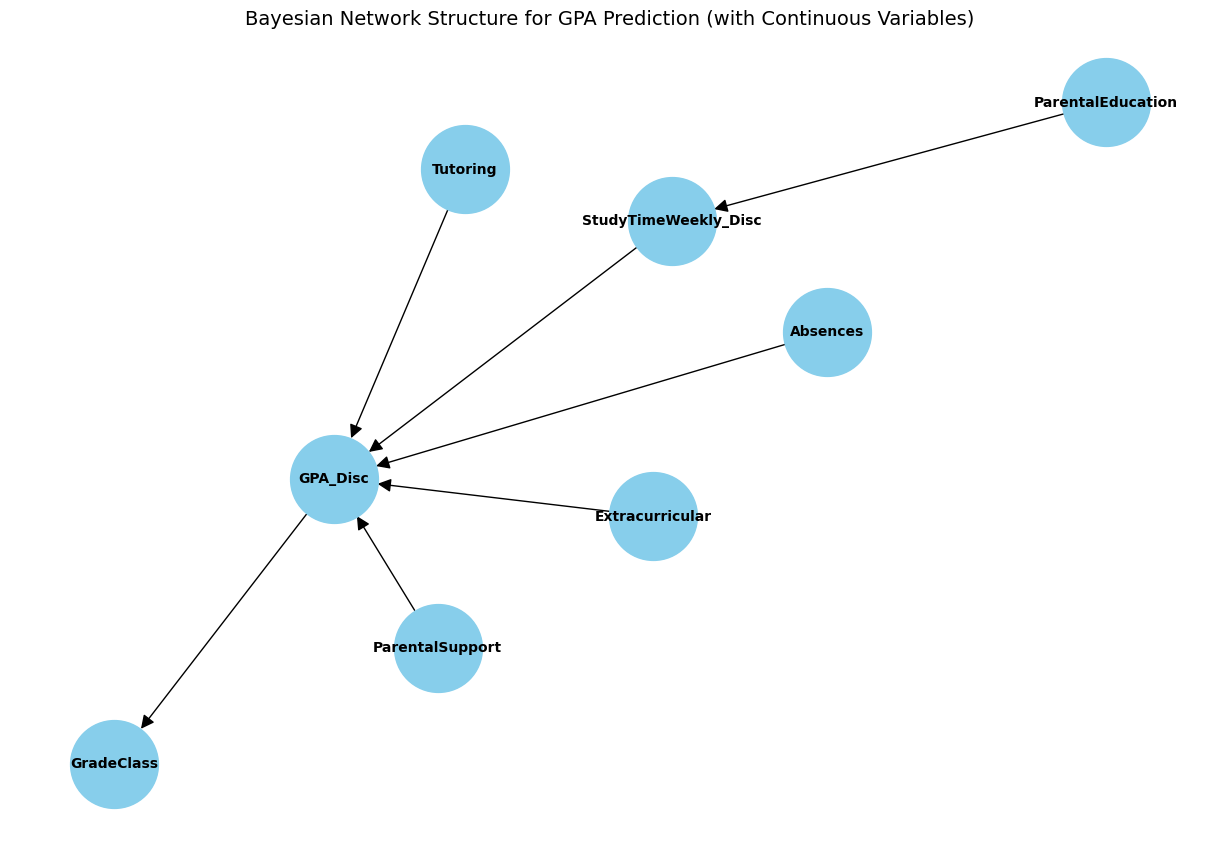

In [160]:
edges_bn = [
    ('ParentalEducation', 'StudyTimeWeekly_Disc'),
    ('StudyTimeWeekly_Disc', 'GPA_Disc'),
    ('ParentalSupport', 'GPA_Disc'),
    ('Tutoring', 'GPA_Disc'),
    ('Extracurricular', 'GPA_Disc'),
    ('Absences', 'GPA_Disc'),
    ('GPA_Disc', 'GradeClass')
]


# Membuat Directed Graph dari edges yang sudah didefinisikan
model = nx.DiGraph()
model.add_edges_from(edges_bn)

# 4. Visualisasi struktur jaringan
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(model)  # Posisi node menggunakan layout spring
nx.draw(model, pos=pos, with_labels=True, node_size=4000, node_color='skyblue',
        font_size=10, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure for GPA Prediction (with Continuous Variables)", fontsize=14)
plt.show()

#### Edges Menggunakan HillClimbSearch

  0%|          | 0/1000 [00:00<?, ?it/s]

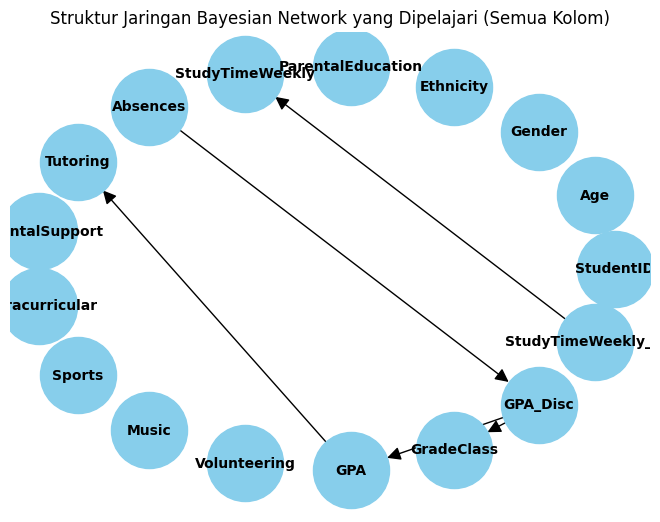


Edges (Hubungan yang Dipelajari Menggunakan Semua Kolom):
[('Absences', 'GPA_Disc'), ('GPA', 'Tutoring'), ('GPA_Disc', 'GradeClass'), ('GPA_Disc', 'GPA'), ('StudyTimeWeekly_Disc', 'StudyTimeWeekly')]


In [177]:
# --- 2. Inisialisasi Algoritma Pembelajaran Struktur dengan SEMUA KOLOM ---
hc = HillClimbSearch(data_bn)

# --- 3. Pelajari Struktur Jaringan MENGGUNAKAN SEMUA KOLOM ---
learned_model = hc.estimate(scoring_method=BicScore(data_bn), max_iter=1000)

# --- 4. Visualisasikan Struktur Jaringan (DAG) ---
pos = nx.circular_layout(learned_model)
nx.draw(learned_model, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight='bold', arrowsize=20)
plt.title("Struktur Jaringan Bayesian Network yang Dipelajari (Semua Kolom)")
plt.show()

# --- 5. Dapatkan Edges (Hubungan yang Dipelajari) ---
edges_bn = learned_model.edges()
print("\nEdges (Hubungan yang Dipelajari Menggunakan Semua Kolom):")
print(list(edges_bn))

### Feature dan Split

In [178]:
# --- 1. Ambil semua node unik dari edges ---
nodes_in_edges = set()
for parent, child in edges_bn:
    nodes_in_edges.add(parent)
    nodes_in_edges.add(child)

# --- 2. Buat list kolom yang mau disimpan ---
columns_to_keep = list(nodes_in_edges)
print("Kolom yang dipakai:", columns_to_keep)

Kolom yang dipakai: ['StudyTimeWeekly', 'Absences', 'StudyTimeWeekly_Disc', 'GPA', 'GPA_Disc', 'GradeClass', 'Tutoring']


In [179]:
# --- 3. Pisahkan fitur & target dari data_bn ---
# Target variabel yang akan diprediksi
target_bn = ["GPA_Disc", "GradeClass"]

# Fitur berdasarkan edges_bn (drop target supaya tidak bocor)
features_bn = data_bn[columns_to_keep].drop(columns=target_bn, errors='ignore')

# Target (label)
target_data = data_bn[target_bn]

# --- 4. Split data menjadi training dan testing ---
train_features, test_features, train_target, test_target = train_test_split(
    features_bn,
    target_data,
    test_size=0.2,
    random_state=42,
    stratify=data_bn['GradeClass'] # bisa juga stratify ke GPA_Disc atau GradeClass, pilih sesuai target utama
)

# Gabungkan fitur dan target jadi satu dataframe
train_data_bn = train_features.copy()
train_data_bn['GPA_Disc'] = train_target['GPA_Disc']
train_data_bn['GradeClass'] = train_target['GradeClass']

test_data_bn = test_features.copy()
test_data_bn['GPA_Disc'] = test_target['GPA_Disc']
test_data_bn['GradeClass'] = test_target['GradeClass']

# --- 5. Cek hasil ---
print(f"\nTraining set size: {len(train_features)}")
print(f"Testing set size: {len(test_features)}")
print(f"Fitur digunakan: {train_features.columns.tolist()}")
print(f"Target: {train_target.columns.tolist()}")


Training set size: 1913
Testing set size: 479
Fitur digunakan: ['StudyTimeWeekly', 'Absences', 'StudyTimeWeekly_Disc', 'GPA', 'Tutoring']
Target: ['GPA_Disc', 'GradeClass']


### Model & Compute Conditional Probability Tables (CPT)

In [180]:
# Membuat model jaringan
model_bn = BayesianNetwork(edges_bn)

from pgmpy.estimators import MaximumLikelihoodEstimator
# Estimasi parameter (CPT) dengan menggunakan data training
model_bn.fit(train_data_bn, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=5)

# --- Menampilkan CPT untuk setiap variabel dalam jaringan ---
for cpd in model_bn.get_cpds():
    print(f"\nCPT untuk {cpd.variable}:")
    print(cpd)


CPT untuk Absences:
+-------------+----------+
| Absences(0) | 0.187174 |
+-------------+----------+
| Absences(1) | 0.192909 |
+-------------+----------+
| Absences(2) | 0.211679 |
+-------------+----------+
| Absences(3) | 0.213243 |
+-------------+----------+
| Absences(4) | 0.194995 |
+-------------+----------+

CPT untuk GPA_Disc:
+-------------+-----+-----------------------+
| Absences    | ... | Absences(4)           |
+-------------+-----+-----------------------+
| GPA_Disc(0) | ... | 0.0005347593582887701 |
+-------------+-----+-----------------------+
| GPA_Disc(1) | ... | 0.0005347593582887701 |
+-------------+-----+-----------------------+
| GPA_Disc(2) | ... | 0.0005347593582887701 |
+-------------+-----+-----------------------+
| GPA_Disc(3) | ... | 0.0005347593582887701 |
+-------------+-----+-----------------------+
| GPA_Disc(4) | ... | 0.9978609625668449    |
+-------------+-----+-----------------------+

CPT untuk GPA:
+----------+-----------------------+-----+-----

### Inferensi Probabilistik

In [181]:
# Langkah 5: Lakukan inferensi dengan data test
inference = VariableElimination(model_bn)

# Simpan hasil prediksi
predictions_gpa_disc = []
predictions_grade_class = []

# Lakukan prediksi untuk setiap baris data di test_data_bn
for i in range(len(test_data_bn)):
    # Pastikan hanya menggunakan fitur relevan (tanpa target)
    evidence = test_data_bn.iloc[i].drop(['GPA_Disc', 'GradeClass'])

    # Prediksi distribusi probabilitas untuk 'GPA_Disc'
    gpa_disc_prob = inference.query(variables=['GPA_Disc'], evidence=evidence)
    predictions_gpa_disc.append(gpa_disc_prob.values.argmax())  # Ambil nilai dengan probabilitas tertinggi

    # Prediksi distribusi probabilitas untuk 'GradeClass'
    grade_class_prob = inference.query(variables=['GradeClass'], evidence=evidence)
    predictions_grade_class.append(grade_class_prob.values.argmax())  # Ambil nilai dengan probabilitas tertinggi

# Ubah GradeClass jadi angka
true_gpa_disc = test_data_bn['GPA_Disc'].astype(int)
true_grade_class = test_data_bn['GradeClass'].astype(int)

# Sekarang baru bisa hitung
gpa_disc_accuracy = accuracy_score(true_gpa_disc, predictions_gpa_disc)
grade_class_accuracy = accuracy_score(true_grade_class, predictions_grade_class)

print(f"Akurasi Prediksi GPA_Disc: {gpa_disc_accuracy * 100:.2f}%")
print(f"Akurasi Prediksi GradeClass: {grade_class_accuracy * 100:.2f}%")

Akurasi Prediksi GPA_Disc: 79.96%
Akurasi Prediksi GradeClass: 74.74%


### Analisis Kausal dan hubungan antar variabel

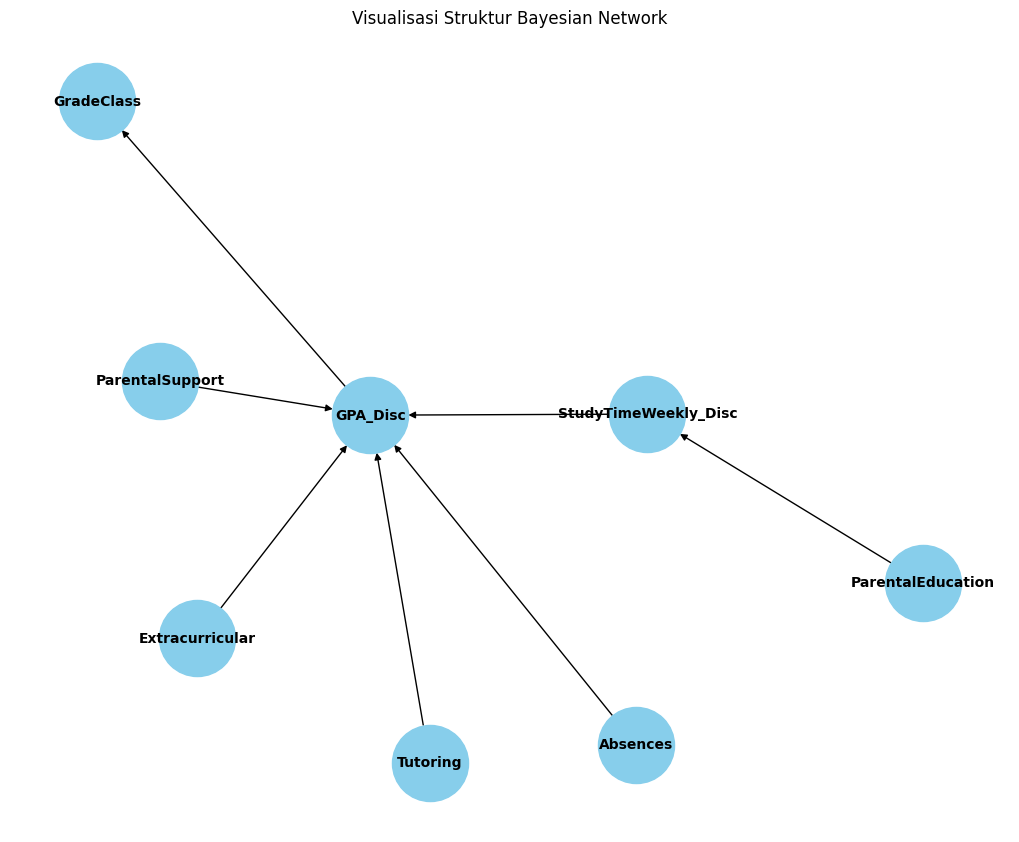

In [147]:
# Mengonversi Bayesian Network ke NetworkX Graph
G = nx.DiGraph()  # Menggunakan Directed Graph karena Bayesian Network adalah directed
edges = model_bn.edges()

# Menambahkan edge dari model_bn ke graph NetworkX
G.add_edges_from(edges)

# Visualisasi NetworkX Graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Visualisasi Struktur Bayesian Network')
plt.show()

In [148]:
evidence

Absences                3
StudyTimeWeekly_Disc    4
Extracurricular         4
ParentalEducation       1
ParentalSupport         0
Tutoring                0
Name: 1414, dtype: int64

In [149]:
evidence_0 = evidence.copy()
evidence_0['ParentalSupport'] = 0
gpa_0 = inference.query(variables=['GradeClass'], evidence=evidence_0)

evidence_1 = evidence.copy()
evidence_1['ParentalSupport'] = 1
gpa_1 = inference.query(variables=['GradeClass'], evidence=evidence_1)

print(f"Prediksi GPA dengan ParentalSupport=0: {gpa_0}")
print(f"Prediksi GPA dengan ParentalSupport=1: {gpa_1}")

# Ambil nilai kelas dengan probabilitas tertinggi
gpa_0_class = gpa_0.values.argmax()  # Menentukan kelas dengan probabilitas tertinggi
gpa_1_class = gpa_1.values.argmax()  # Menentukan kelas dengan probabilitas tertinggi

print(f"Prediksi GradeClass dengan ParentalSupport=0: {gpa_0_class}")
print(f"Prediksi GradeClass dengan ParentalSupport=1: {gpa_1_class}")

Prediksi GPA dengan ParentalSupport=0: +---------------+-------------------+
| GradeClass    |   phi(GradeClass) |
+===============+===================+
| GradeClass(0) |            0.0132 |
+---------------+-------------------+
| GradeClass(1) |            0.0268 |
+---------------+-------------------+
| GradeClass(2) |            0.0181 |
+---------------+-------------------+
| GradeClass(3) |            0.0200 |
+---------------+-------------------+
| GradeClass(4) |            0.9218 |
+---------------+-------------------+
Prediksi GPA dengan ParentalSupport=1: +---------------+-------------------+
| GradeClass    |   phi(GradeClass) |
+===============+===================+
| GradeClass(0) |            0.0121 |
+---------------+-------------------+
| GradeClass(1) |            0.0257 |
+---------------+-------------------+
| GradeClass(2) |            0.0170 |
+---------------+-------------------+
| GradeClass(3) |            0.0189 |
+---------------+-------------------+
| GradeCla

### Save Model

In [197]:
# **Menyimpan model ke file**
# Menyimpan model Bayesian Network ke dalam file
with open('model_bn.pkl', 'wb') as model_file:
    pickle.dump(model_bn, model_file)

# Jika ingin menyimpan model inferensi secara terpisah
with open('inference_bn.pkl', 'wb') as inference_file:
    pickle.dump(inference, inference_file)

print("Model dan inferensi telah disimpan ke file 'model_bn.pkl' dan 'inference_bn.pkl'.")

Model dan inferensi telah disimpan ke file 'model_bn.pkl' dan 'inference_bn.pkl'.


## Naive Bayes Classifier

### Dataset

In [183]:
data_nbc = data_normalization.copy()
data_nbc.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass GPA_Disc StudyTimeWeekly_Disc  
0             0  2.929196         2.0        2                    3  
1             0  3.042915         1.0        1                    3  
2             0  1.900000         4.0        4                    0  
3             0  2.054218         3.0        3                    2  
4             0  1.900000         4.0        4                    0

In [184]:
# Step awal ambil data
data_nbc = data_normalization.copy()

# Diskritisasi hanya fitur numerik murni
numerical_features_nbc = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Discretize
discretizer_nbc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_nbc[numerical_features_nbc] = discretizer_nbc.fit_transform(data_nbc[numerical_features_nbc])

# Pastikan semua kolom integer
data_nbc = data_nbc.astype(int)

# Hapus NaN jika ada
data_nbc = data_nbc.dropna().reset_index(drop=True)

data_nbc.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001    3       1          0                  2                4   
1       1002    4       0          0                  1                3   
2       1003    0       0          2                  3                1   
3       1004    3       1          0                  3                2   
4       1005    3       1          0                  2                1   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         1         1                2                0       0      1   
1         0         0                1                0       0      0   
2         4         0                2                0       0      0   
3         2         0                3                1       0      0   
4         2         1                3                0       0      0   

   Volunteering  GPA  GradeClass  GPA_Disc  StudyTimeWeekly_Disc  
0             0    2           2         2                     3  
1             0    2           1         1                     3  
2             0    0           4         4                     0  
3             0    0           3         3                     2  
4             0    0           4         4                     0

### Struktur

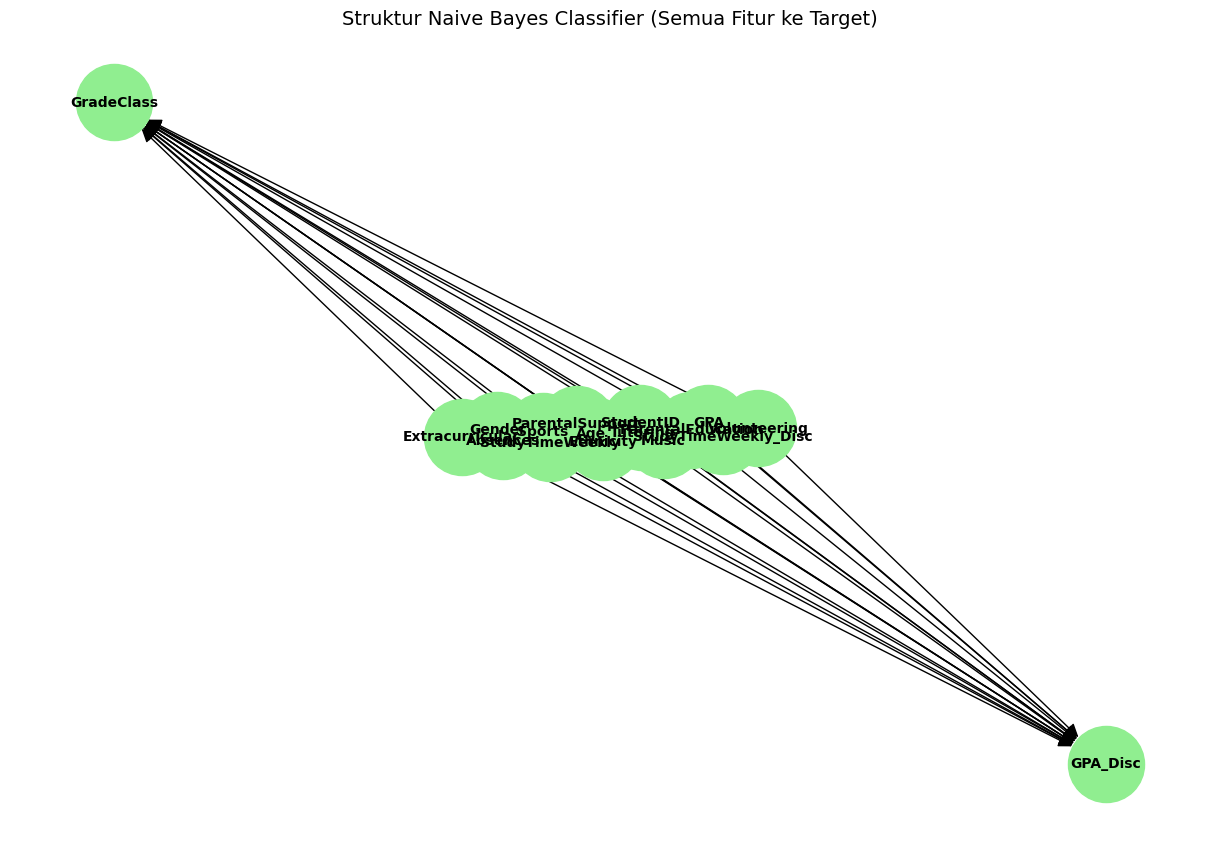

In [185]:
# Definisikan target
target_variables = ['GPA_Disc', 'GradeClass']

# Ambil semua fitur selain target
feature_variables = [col for col in data_nbc.columns if col not in target_variables]

# Buat Directed Graph
G_nbc = nx.DiGraph()
for feature in feature_variables:
    for target in target_variables:
        G_nbc.add_edge(feature, target)

# Visualisasikan
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_nbc)
nx.draw(G_nbc, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight='bold', arrowsize=20)
plt.title("Struktur Naive Bayes Classifier (Semua Fitur ke Target)", fontsize=14)
plt.show()


### Split Data

In [186]:
# Pisahkan fitur dan target untuk data latih dan data uji
X_nbc = data_nbc[feature_variables]
y_gpa_disc_nbc = data_nbc['GPA_Disc']
y_grade_class_nbc = data_nbc['GradeClass']

X_train_nbc, X_test_nbc, y_gpa_disc_train_nbc, y_gpa_disc_test_nbc = train_test_split(
    X_nbc, y_gpa_disc_nbc, test_size=0.2, random_state=42, stratify=y_gpa_disc_nbc
)

_, _, y_grade_class_train_nbc, y_grade_class_test_nbc = train_test_split(
    X_nbc, y_grade_class_nbc, test_size=0.2, random_state=42, stratify=y_grade_class_nbc
)

# Periksa jumlah kolom pada data latih dan uji
print(f"Dimensi data latih: {X_train_nbc.shape}")
print(f"Dimensi data uji: {X_test_nbc.shape}")

# Pastikan kolom yang digunakan untuk prediksi sama antara latih dan uji
assert X_train_nbc.shape[1] == X_test_nbc.shape[1], "Jumlah fitur pada data latih dan uji tidak sesuai!"

Dimensi data latih: (1913, 15)
Dimensi data uji: (479, 15)


### Model

In [187]:
# Model untuk GPA_Disc
model_gpa_disc_nbc = CategoricalNB()
model_gpa_disc_nbc.fit(X_train_nbc, y_gpa_disc_train_nbc)

# Model untuk GradeClass
model_grade_class_nbc = CategoricalNB()
model_grade_class_nbc.fit(X_train_nbc, y_grade_class_train_nbc)

CategoricalNB()

### CPT

In [188]:
# CPT untuk GPA_Disc
print("Tabel Probabilitas Fitur untuk GPA_Disc:")
for class_idx, class_log_prob in enumerate(model_gpa_disc_nbc.feature_log_prob_):
    print(f"\nKelas {class_idx}:")
    probs = np.exp(class_log_prob)  # balik dari log-prob ke prob
    for idx, prob in enumerate(probs):
        if isinstance(prob, np.ndarray):
            for cat_idx, p in enumerate(prob):
                print(f"  Feature {idx} - Category {cat_idx}: Probabilitas: {p:.4f}")
        else:
            print(f"  Feature {idx}: Probabilitas: {prob:.4f}")

# CPT untuk GradeClass
print("\nTabel Probabilitas Fitur untuk GradeClass:")
for class_idx, class_log_prob in enumerate(model_grade_class_nbc.feature_log_prob_):
    print(f"\nKelas {class_idx}:")
    probs = np.exp(class_log_prob)
    for idx, prob in enumerate(probs):
        if isinstance(prob, np.ndarray):
            for cat_idx, p in enumerate(prob):
                print(f"  Feature {idx} - Category {cat_idx}: Probabilitas: {p:.4f}")
        else:
            print(f"  Feature {idx}: Probabilitas: {prob:.4f}")


Tabel Probabilitas Fitur untuk GPA_Disc:

Kelas 0:
  Feature 0 - Category 0: Probabilitas: 0.0003
  Feature 0 - Category 1: Probabilitas: 0.0003
  Feature 0 - Category 2: Probabilitas: 0.0003
  Feature 0 - Category 3: Probabilitas: 0.0003
  Feature 0 - Category 4: Probabilitas: 0.0003
  Feature 0 - Category 5: Probabilitas: 0.0003
  Feature 0 - Category 6: Probabilitas: 0.0003
  Feature 0 - Category 7: Probabilitas: 0.0003
  Feature 0 - Category 8: Probabilitas: 0.0003
  Feature 0 - Category 9: Probabilitas: 0.0003
  Feature 0 - Category 10: Probabilitas: 0.0003
  Feature 0 - Category 11: Probabilitas: 0.0003
  Feature 0 - Category 12: Probabilitas: 0.0003
  Feature 0 - Category 13: Probabilitas: 0.0003
  Feature 0 - Category 14: Probabilitas: 0.0003
  Feature 0 - Category 15: Probabilitas: 0.0003
  Feature 0 - Category 16: Probabilitas: 0.0003
  Feature 0 - Category 17: Probabilitas: 0.0003
  Feature 0 - Category 18: Probabilitas: 0.0003
  Feature 0 - Category 19: Probabilitas: 0.0003

### Inferensi Prediksi

In [80]:
numerical_features

['Age',
 'StudyTimeWeekly',
 'Absences',
 'GPA',
 'GPA_Disc',
 'StudyTimeWeekly_Disc',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GradeClass',
 'Tutoring']

In [189]:
# Gunakan KBinsDiscretizer untuk mendiskritisasi fitur numerik
discretizer_nbc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Transformasi fitur latih dan uji
X_train_nbc_transformed = discretizer_nbc.fit_transform(X_train_nbc[numerical_features_nbc])
X_test_nbc_transformed = discretizer_nbc.transform(X_test_nbc[numerical_features_nbc])

# Model untuk GPA_Disc
model_gpa_disc_nbc = CategoricalNB()
model_gpa_disc_nbc.fit(X_train_nbc_transformed, y_gpa_disc_train_nbc)

# Model untuk GradeClass
model_grade_class_nbc = CategoricalNB()
model_grade_class_nbc.fit(X_train_nbc_transformed, y_grade_class_train_nbc)

# Prediksi untuk data uji
y_pred_gpa_disc_nbc = model_gpa_disc_nbc.predict(X_test_nbc_transformed)
y_pred_grade_class_nbc = model_grade_class_nbc.predict(X_test_nbc_transformed)

# Evaluasi model
print("\nAkurasi GPA_Disc:", accuracy_score(y_gpa_disc_test_nbc, y_pred_gpa_disc_nbc))
print(classification_report(y_gpa_disc_test_nbc, y_pred_gpa_disc_nbc))

print("\nAkurasi GradeClass:", accuracy_score(y_grade_class_test_nbc, y_pred_grade_class_nbc))
print(classification_report(y_grade_class_test_nbc, y_pred_grade_class_nbc))


Akurasi GPA_Disc: 0.8037578288100209
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.69      0.86      0.76        49
           2       0.64      0.75      0.69        77
           3       0.69      0.33      0.44        83
           4       0.89      0.98      0.93       255

    accuracy                           0.80       479
   macro avg       0.78      0.70      0.72       479
weighted avg       0.80      0.80      0.79       479


Akurasi GradeClass: 0.7473903966597077
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        21
           1       0.60      0.76      0.67        54
           2       0.60      0.64      0.62        78
           3       0.55      0.25      0.35        83
           4       0.85      0.98      0.91       243

    accuracy                           0.75       479
   macro avg       0.72      0.61      0.63       479

### Analisis Sensitivitas

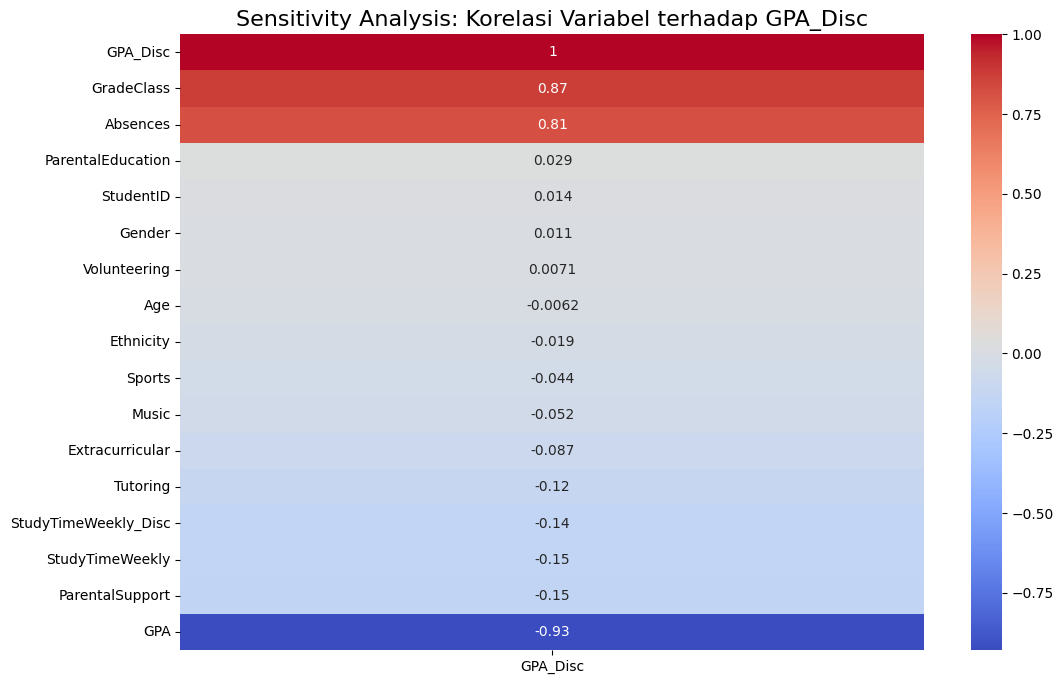

In [190]:
plt.figure(figsize=(12,8))
sns.heatmap(data_nbc.corr()[['GPA_Disc']].sort_values(by='GPA_Disc', ascending=False), annot=True, cmap="coolwarm")
plt.title("Sensitivity Analysis: Korelasi Variabel terhadap GPA_Disc", fontsize=16)
plt.show()

### Evaluasi Prediksi

In [193]:
# --- Evaluasi prediksi dummy untuk GPA ---
# Gunakan rata-rata GPA pada data latih untuk membuat prediksi dummy
gpa_pred = [y_gpa_disc_train_nbc.mean()] * len(y_gpa_disc_test_nbc)  # Dummy prediction untuk GPA

# Hitung MAE dan RMSE untuk prediksi GPA
mae = mean_absolute_error(y_gpa_disc_test_nbc, gpa_pred)
rmse = np.sqrt(mean_squared_error(y_gpa_disc_test_nbc, gpa_pred))

# Tampilkan hasil evaluasi
print(f"\nMean Absolute Error (MAE) untuk GPA_Disc: {mae:.4f}")
print(f"Root Mean Squared Error (RMSE) untuk GPA_Disc: {rmse:.4f}")


Mean Absolute Error (MAE) untuk GPA_Disc: 0.9871
Root Mean Squared Error (RMSE) untuk GPA_Disc: 1.1742


In [195]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Dummy prediction dengan strategi most frequent
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_nbc, y_grade_class_train_nbc)

# Prediksi untuk data uji
gradeclass_pred = dummy_clf.predict(X_test_nbc)

# Evaluasi Model
accuracy = accuracy_score(y_grade_class_test_nbc, gradeclass_pred)

# Menambahkan zero_division=1 untuk menangani masalah undefined metric
precision = precision_score(y_grade_class_test_nbc, gradeclass_pred, average='weighted', zero_division=1)
recall = recall_score(y_grade_class_test_nbc, gradeclass_pred, average='weighted', zero_division=1)

# Tampilkan hasil evaluasi
print(f"Akurasi GradeClass: {accuracy:.4f}")
print(f"Presisi GradeClass: {precision:.4f}")
print(f"Recall GradeClass: {recall:.4f}")


Akurasi GradeClass: 0.5073
Presisi GradeClass: 0.7501
Recall GradeClass: 0.5073


## BOTTOM

# Fitur Tambahan

# Evaluasi dan Validasi

## Function

### Bayesian Network

#### K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

def k_fold_cross_validation(model, X, y, k=5):
    """
    Melakukan K-Fold Cross-validation untuk mengevaluasi performa model.

    Parameters:
    - model: Model yang akan dievaluasi (misalnya Bayesian Network).
    - X: Data fitur (DataFrame atau array).
    - y: Target yang ingin diprediksi (DataFrame atau array).
    - k: Jumlah fold untuk cross-validation (default 5).

    Returns:
    - scores: Daftar skor (misalnya akurasi) untuk setiap fold.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Evaluasi model menggunakan cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    return scores

# Contoh penggunaan: Cross-validation untuk model Random Forest
rf_model = RandomForestClassifier(random_state=42)
X = data.drop(columns=['GPA_Disc', 'GradeClass'])
y = data['GPA_Disc']  # Target yang ingin diprediksi, misalnya 'GPA_Disc'

rf_scores = k_fold_cross_validation(rf_model, X, y, k=5)
print(f"Akurasi Cross-validation Random Forest: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")


#### Sensitivity Analysis terhadap Parameter Model

In [ ]:
from pgmpy.estimators import BayesianEstimator

def sensitivity_analysis(model_bn, train_data_bn, param_range):
    """
    Fungsi untuk melakukan sensitivity analysis terhadap parameter model.

    Parameters:
    - model_bn: Model Bayesian Network yang telah dilatih.
    - train_data_bn: Data pelatihan untuk melatih model.
    - param_range: Rentang parameter yang ingin diuji.

    Returns:
    - results: Dictionary dengan hasil evaluasi untuk setiap parameter.
    """
    results = {}

    for param in param_range:
        # Estimasi parameter dengan nilai parameter yang berbeda
        model_bn.fit(train_data_bn, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=param)

        # Lakukan evaluasi model (misalnya menggunakan cross-validation)
        scores = k_fold_cross_validation(model_bn, train_data_bn.drop(columns=['GPA_Disc', 'GradeClass']), train_data_bn['GPA_Disc'], k=5)

        results[param] = scores.mean()

    return results

# Uji sensitivity terhadap nilai equivalent_sample_size
param_range = [5, 10, 15, 20, 25]  # Contoh rentang parameter
sensitivity_results = sensitivity_analysis(model_bn, train_data_bn, param_range)

print("Hasil Sensitivity Analysis terhadap equivalent_sample_size:")
for param, score in sensitivity_results.items():
    print(f"equivalent_sample_size = {param}, Akurasi = {score:.4f}")


#### Comparison dengan Baseline Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def baseline_comparison(X, y, k=5):
    """
    Fungsi untuk membandingkan model dengan baseline models.

    Parameters:
    - X: Data fitur (DataFrame atau array).
    - y: Target yang ingin diprediksi (DataFrame atau array).
    - k: Jumlah fold untuk cross-validation (default 5).

    Returns:
    - comparison_results: Dictionary dengan hasil evaluasi untuk setiap model.
    """
    comparison_results = {}

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_scores = k_fold_cross_validation(rf_model, X, y, k)
    comparison_results['Random Forest'] = rf_scores.mean()

    # Linear Regression (untuk tugas regresi)
    lr_model = LinearRegression()
    lr_scores = k_fold_cross_validation(lr_model, X, y, k)
    comparison_results['Linear Regression'] = lr_scores.mean()

    return comparison_results

# Contoh penggunaan: Bandingkan dengan baseline
comparison_results = baseline_comparison(X, y, k=5)

print("\nPerbandingan Model dengan Baseline:")
for model_name, score in comparison_results.items():
    print(f"{model_name}: {score:.4f}")


### Naive Bayes Classifier

#### K-Fold Cross-Validation

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score

def k_fold_cross_validation_naive_bayes(X, y, k=5):
    """
    Cross-validation untuk model Naive Bayes.

    Parameters:
    - X: Data fitur (DataFrame atau array).
    - y: Target yang ingin diprediksi (DataFrame atau array).
    - k: Jumlah fold untuk cross-validation (default 5).

    Returns:
    - scores: Daftar skor (misalnya akurasi) untuk setiap fold.
    """
    nb_model = CategoricalNB()  # Model Naive Bayes kategori

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Evaluasi model menggunakan cross-validation
    scores = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')

    return scores

# Contoh penggunaan: Cross-validation untuk Naive Bayes
X = data.drop(columns=['GPA_Disc', 'GradeClass'])
y = data['GPA_Disc']  # Target yang ingin diprediksi, misalnya 'GPA_Disc'

nb_scores = k_fold_cross_validation_naive_bayes(X, y, k=5)
print(f"Akurasi Cross-validation Naive Bayes: {nb_scores.mean():.4f} ± {nb_scores.std():.4f}")


#### Sensitivity Analysis terhadap Parameter Model

In [ ]:
def sensitivity_analysis_naive_bayes(X, y, alpha_range):
    """
    Melakukan sensitivity analysis terhadap parameter alpha pada Naive Bayes.

    Parameters:
    - X: Data fitur (DataFrame atau array).
    - y: Target yang ingin diprediksi (DataFrame atau array).
    - alpha_range: Rentang nilai alpha yang ingin diuji.

    Returns:
    - results: Dictionary dengan hasil evaluasi untuk setiap alpha.
    """
    results = {}

    for alpha in alpha_range:
        nb_model = CategoricalNB(alpha=alpha)  # Naive Bayes dengan alpha yang berbeda

        # Evaluasi model menggunakan cross-validation
        scores = k_fold_cross_validation_naive_bayes(X, y, k=5)

        results[alpha] = scores.mean()

    return results

# Uji sensitivity terhadap nilai alpha
alpha_range = [0.1, 0.5, 1.0, 2.0, 5.0]
sensitivity_results = sensitivity_analysis_naive_bayes(X, y, alpha_range)

print("Hasil Sensitivity Analysis terhadap alpha Naive Bayes:")
for alpha, score in sensitivity_results.items():
    print(f"alpha = {alpha}, Akurasi = {score:.4f}")


#### Comparison dengan Baseline Models

In [ ]:
def baseline_comparison_naive_bayes(X, y, k=5):
    """
    Fungsi untuk membandingkan model Naive Bayes dengan baseline models.

    Parameters:
    - X: Data fitur (DataFrame atau array).
    - y: Target yang ingin diprediksi (DataFrame atau array).
    - k: Jumlah fold untuk cross-validation (default 5).

    Returns:
    - comparison_results: Dictionary dengan hasil evaluasi untuk setiap model.
    """
    comparison_results = {}

    # Naive Bayes
    nb_model = CategoricalNB()
    nb_scores = k_fold_cross_validation_naive_bayes(X, y, k)
    comparison_results['Naive Bayes'] = nb_scores.mean()

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_scores = k_fold_cross_validation(rf_model, X, y, k)
    comparison_results['Random Forest'] = rf_scores.mean()

    # Linear Regression (untuk tugas regresi)
    lr_model = LinearRegression()
    lr_scores = k_fold_cross_validation(lr_model, X, y, k)
    comparison_results['Linear Regression'] = lr_scores.mean()

    return comparison_results

# Contoh penggunaan: Bandingkan dengan baseline
comparison_results_naive_bayes = baseline_comparison_naive_bayes(X, y, k=5)

print("\nPerbandingan Model Naive Bayes dengan Baseline:")
for model_name, score in comparison_results_naive_bayes.items():
    print(f"{model_name}: {score:.4f}")


## Metrik Evaluasi Wajib

### Bayesian Network

### Naive Bayes Classifier

## Metrik Validasi Wajib

### Bayesian Network

### Naive Bayes Classifier